In [1]:
import sys
sys.path.append('../src')
import MODULE_CQS_Attention as cqs_att
import numpy as np

In [2]:
# Set the value for whole sequence length (N), head dimension (d), and # worker devices (W)
N = 11
d = 5
W = 7

In [3]:
# Initialize Q, K, V, and CQS_Attention
Q = np.random.rand(N,d)
K = np.random.rand(N,d)
V = np.random.rand(N,d)
cqs_attention = cqs_att.CQS_Attention(Q,K,V,W)

In [4]:
################ WORKFLOW ################

# Run the workflow, including Scheduler computing the partition, 
# Workers doing local computation, and Titler putting local results together.
# Output attention is stored as "cqs_attention.O"
# For a clean look, set "display = False". It mutes the workflow details.
# We suggest to set it to True when N < 30, modify as you wish.

if N < 30:
    display = True
else:
    display = False
cqs_attention.workflow(display = display)

===== Scheduler =====
N = 11, W = 7, d = 5

Interest Set
[0, 1, 3]

TG-Tk map
{0: [0], 1: [1], 2: [2], 3: [3, 4], 4: [5, 6], 5: [7, 8], 6: [9, 10]}

CQS
[[0, 1, 3], [1, 2, 4], [2, 3, 5], [3, 4, 6], [4, 5, 0], [5, 6, 1], [6, 0, 2]]

undistilled pair list
[[(0, 1), (0, 3), (1, 3)], [(1, 2), (1, 4), (2, 4)], [(2, 3), (2, 5), (3, 5)], [(3, 4), (3, 6), (4, 6)], [(4, 5), (0, 4), (0, 5)], [(5, 6), (1, 5), (1, 6)], [(0, 6), (2, 6), (0, 2)]]

distilled pair list
[[(0, 1), (0, 3), (1, 3)], [(1, 2), (1, 4), (2, 4)], [(2, 3), (2, 5), (3, 5)], [(3, 4), (3, 6), (4, 6)], [(4, 5), (0, 4), (0, 5)], [(5, 6), (1, 5), (1, 6)], [(0, 6), (2, 6), (0, 2)]]

distilled CQS
[[0, 1, 3], [1, 2, 4], [2, 3, 5], [3, 4, 6], [0, 4, 5], [1, 5, 6], [0, 2, 6]]

MtrlL
[[0, 1, 3, 4], [1, 2, 5, 6], [2, 3, 4, 7, 8], [3, 4, 5, 6, 9, 10], [0, 5, 6, 7, 8], [1, 7, 8, 9, 10], [0, 2, 9, 10]]

Task lists (ONLY for validation purpose)
[[(0, 0), (0, 1), (1, 0), (0, 3), (3, 0), (0, 4), (4, 0), (1, 3), (3, 1), (1, 4), (4, 1)], [(1, 1), 

In [5]:
################ CORRECTNESS CHECK ################

# Validate the computation correctness by comparing CQS_Attention result with the normal computation result

# Compute O (named as O_0) directly from Q, K, V 
from scipy.special import softmax
O_0 = softmax(Q @ K.T, axis = 1) @ V

# Compare O_0 with CQS_Attention result (cqs_attention.O)
# True for equal, False otherwise.
print('CQS_Attention results is correct:')
np.allclose(O_0,cqs_attention.O)

CQS_Attention results is correct:


True

In [6]:
# Alternatively, we implement the above validation process as "validate_computation_correctness()"
print('CQS_Attention results is correct:')
cqs_attention.validate_computation_correctness()

CQS_Attention results is correct:


True

FYI, approximation of subsequence length ratio is m / W: 0.42857142857142855. Most actual ratios are lower, hence better.
Longest subsequence: 6, ratio to N: 0.5454545454545454
Shortest subsequence: 4, ratio to N: 0.36363636363636365
Average length: 4.714285714285714, ratio to N: 0.4285714285714286
Standard deviation: 0.7559289460184544

Subsequence length distribution


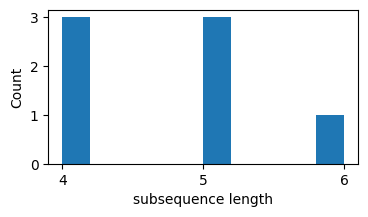

In [7]:
################ MEMORY CONSUMPTION ################

cqs_attention.memory_consumption_summary()

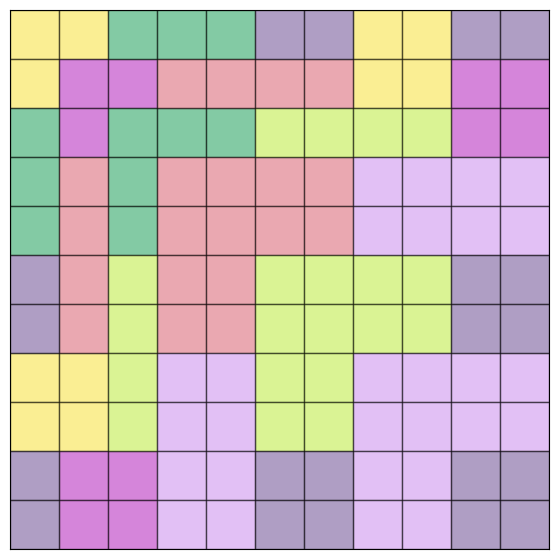

In [9]:
################ VISUALIZE PARTITION OF P ################

# It is NOT recommended to visualize P partition when N is very large due to long redering time.
# When W is large, visualization may not be as clear, because colors are randomly generated and there may be very similar ones.
# Run this cell multiple times for better colors
if N < 100:
    cqs_attention.visualize_P_partition()